In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', 100)
%matplotlib inline

In [2]:
df_train_raw = pd.read_csv('../input/train.csv')
df_test_raw = pd.read_csv('../input/test.csv')
df_train = df_train_raw.copy()
df_test = df_test_raw.copy()
train_len = len(df_train)

In [3]:
df_train.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


In [4]:
df_test.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
5,6,43,services,married,primary,no,574,yes,no,cellular,8,may,140,1,-1,0,unknown
6,7,54,technician,married,secondary,no,324,yes,no,telephone,13,may,51,1,-1,0,unknown
7,8,41,blue-collar,married,secondary,no,121,yes,no,cellular,13,may,16,6,176,5,other
8,9,52,housemaid,married,primary,no,1466,no,yes,cellular,20,nov,150,1,-1,0,unknown
9,10,32,management,married,secondary,no,6217,yes,yes,cellular,18,nov,486,2,181,2,failure


In [5]:
df_train.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
mean,13564,40,1355,15,260,2,40,0,0
std,7831,10,3003,8,260,3,100,2,0
min,1,18,-6847,1,0,1,-1,0,0
25%,6782,33,72,8,104,1,-1,0,0
50%,13564,39,449,16,182,2,-1,0,0
75%,20346,48,1428,21,323,3,-1,0,0
max,27128,95,102127,31,4918,63,871,275,1


In [6]:
df_test.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous
count,18083,18083,18083,18083,18083,18083,18083,18083
mean,9042,40,1371,15,254,2,39,0
std,5220,10,3105,8,253,3,99,1
min,1,18,-8019,1,0,1,-1,0
25%,4521,33,72,8,102,1,-1,0
50%,9042,39,447,16,178,2,-1,0
75%,13562,48,1427,21,314,3,-1,0
max,18083,95,98417,31,3881,50,854,58


In [7]:
df_train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df_test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

欠損値なし

### プロット用関数

In [9]:
def plot_dist_num(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    plt.hist(plot_data[col_name], bins=20)
    plt.title(col_name)
    plt.show()

In [10]:
def plot_dist_obj(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    #data[col_name].value_counts().plot(kind='bar')
    sns.countplot(plot_data[col_name])
    plt.title(col_name)
    plt.show()

In [11]:
def plot_dist(data):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_dist_num(data, col_name)
    
    for col_name in obj_cols:
        plot_dist_obj(data, col_name)

In [12]:
def plot_vs_num(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    col_bin = pd.cut(plot_data[col_name], bins=10)
    sns.barplot(x=col_bin, y=plot_data[y_name])
    plt.ylabel(y_name)
    plt.title(col_name + '_bin')
    plt.show()

In [13]:
def plot_vs_obj(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    sns.barplot(data = plot_data, y=y_name, x=col_name)
    #plt.xlabel(col_name)
    plt.ylabel(y_name)
    plt.title(col_name)
    plt.show()

In [14]:
def plot_vs(data, y_name):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_vs_num(data, col_name, y_name)
    
    for col_name in obj_cols:
        plot_vs_obj(data, col_name, y_name)

In [104]:
def plot_box(data, col_name):
    plt.figure(figsize=(15,3))
    sns.boxplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [105]:
def plot_violin(data, col_name):
    plt.figure(figsize=(15,3))
    sns.violinplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [17]:
train_num_cols = df_train.select_dtypes(include='number').columns
train_obj_cols = df_train.select_dtypes(exclude='number').columns

## まとめてプロット

#### y vs. 連続データ (violinplot)

#### y vs. 連続データ (boxplot)

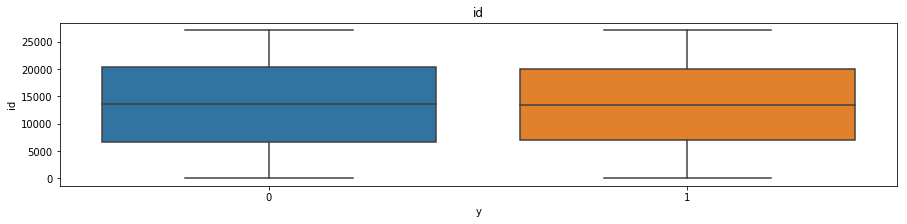

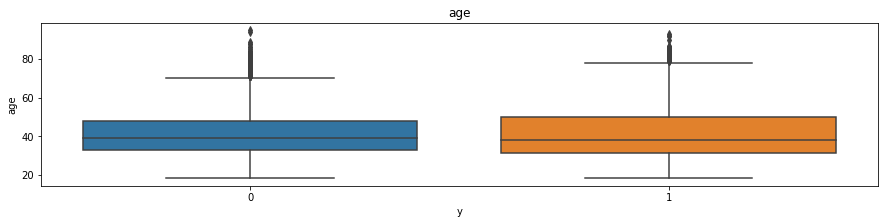

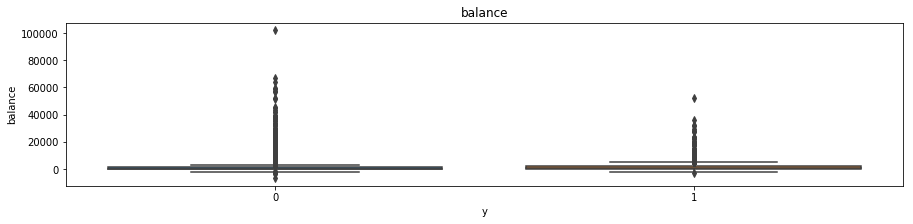

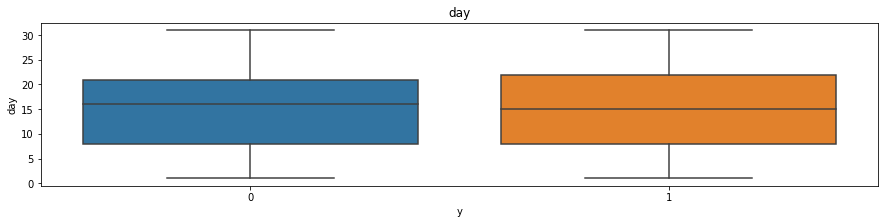

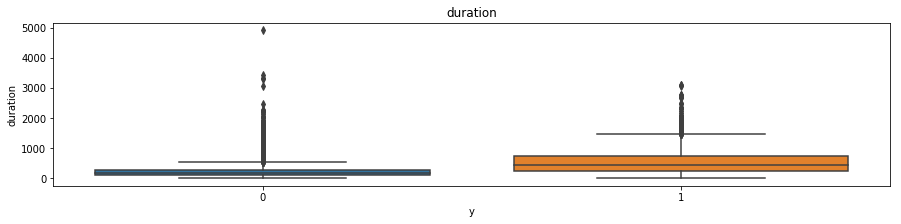

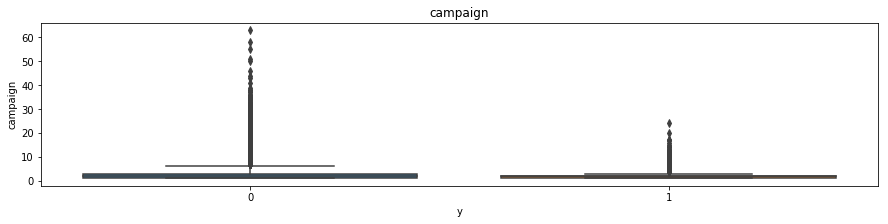

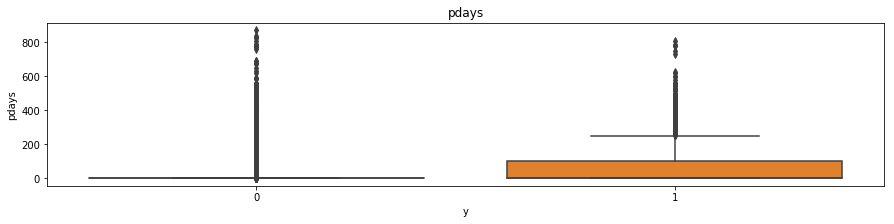

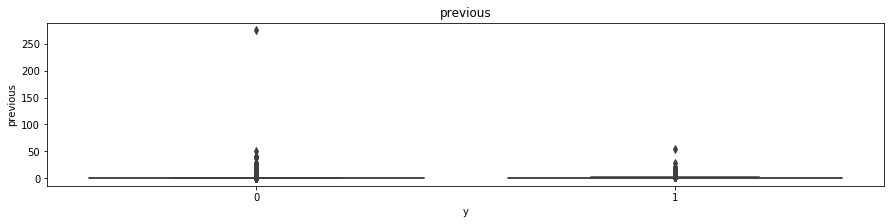

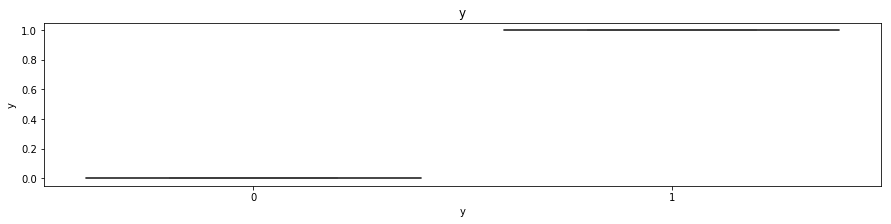

In [106]:
for col_name in train_num_cols:
    plot_box(df_train, col_name)

In [107]:
df_train[df_train.balance>80000]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16312,16313,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,0


In [108]:
df_train[df_train.duration>4000]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9236,9237,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,0


In [110]:
df_train[df_train.previous>100]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3140,3141,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0


## 外れ値削除後

In [83]:
df_out = pd.read_csv('./trian_without_outliers.csv')

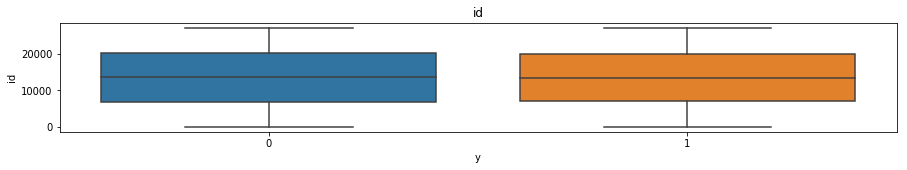

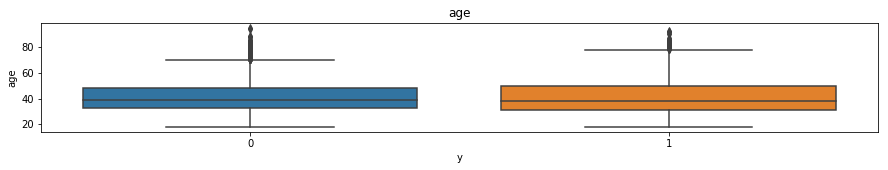

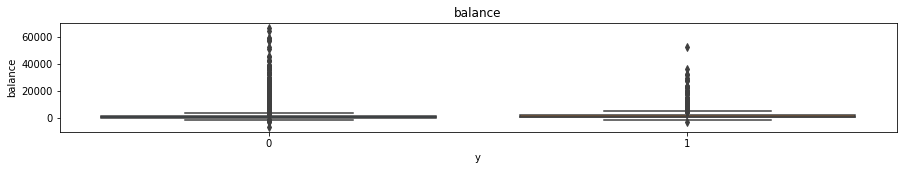

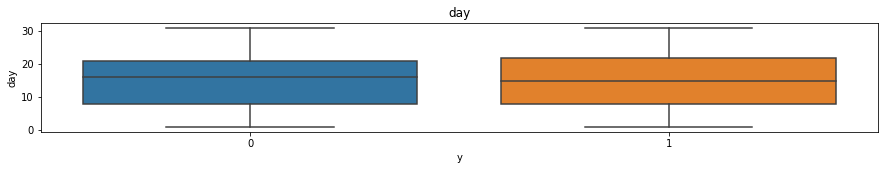

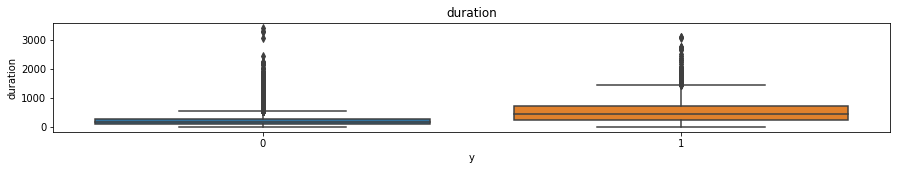

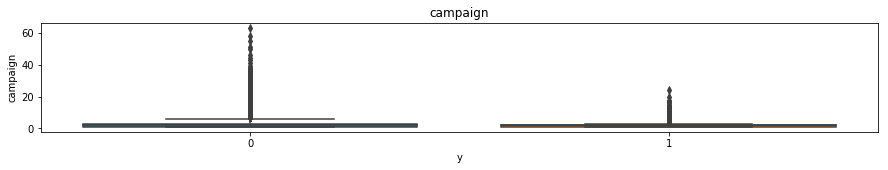

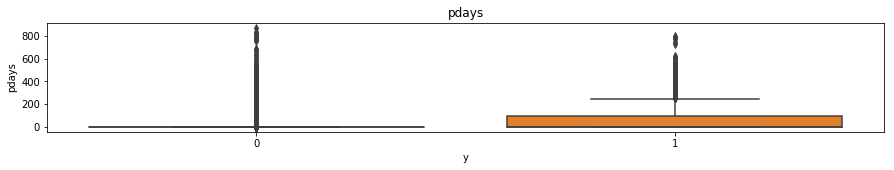

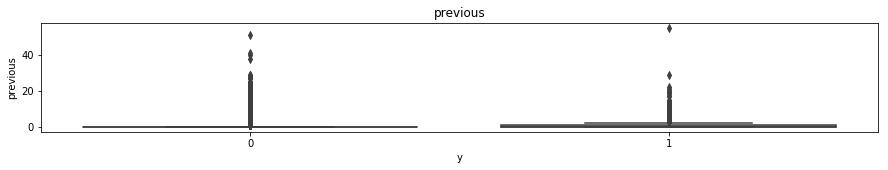

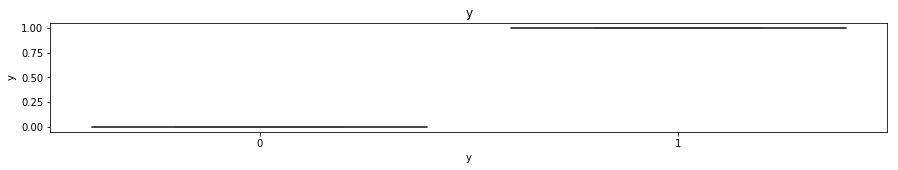

In [20]:
for col_name in train_num_cols:
    plot_box(df_out, col_name)

In [112]:
df_out[df_out.pdays==-1]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,mon_day,mon_day_2
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,4,939,1,-1,0,unknown,1,4/3,127
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,2,172,10,-1,0,unknown,1,2/18,80
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,1,423,1,-1,0,unknown,1,1/25,56
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,6,707,14,-1,0,unknown,1,6/2,188
10,11,35,self-employed,single,tertiary,no,353,no,no,cellular,12,8,582,1,-1,0,unknown,1,8/12,260
11,12,34,technician,divorced,secondary,no,1451,yes,no,unknown,30,5,1097,15,-1,0,unknown,1,5/30,185
12,13,34,admin.,single,tertiary,no,625,no,yes,unknown,31,8,34,1,-1,0,unknown,1,8/31,279
14,15,38,blue-collar,married,primary,no,5839,yes,no,unknown,4,6,984,2,-1,0,unknown,1,6/4,190
15,16,71,technician,married,tertiary,no,383,no,no,cellular,27,4,388,3,-1,0,unknown,1,4/27,151
16,17,62,management,married,tertiary,no,557,no,no,cellular,14,8,185,1,-1,0,unknown,1,8/14,262


In [115]:
df_out[(df_out.pdays==-1) & (df_out.poutcome!='unknown')]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,mon_day,mon_day_2


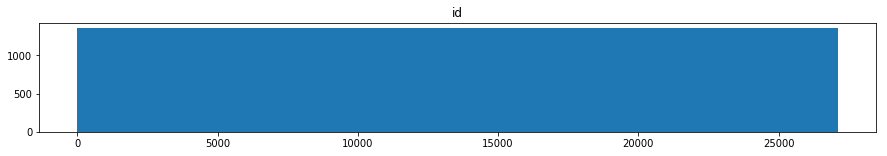

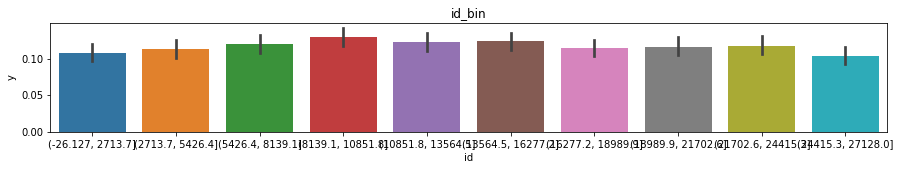

-----------------------------------------------------------


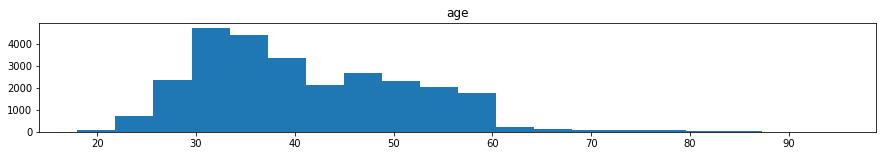

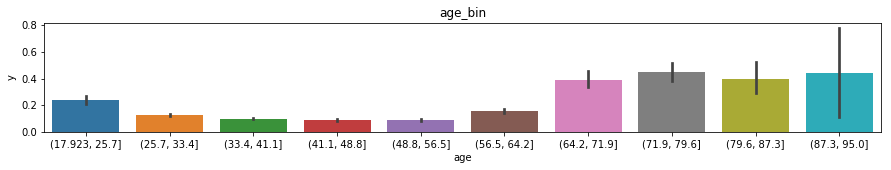

-----------------------------------------------------------


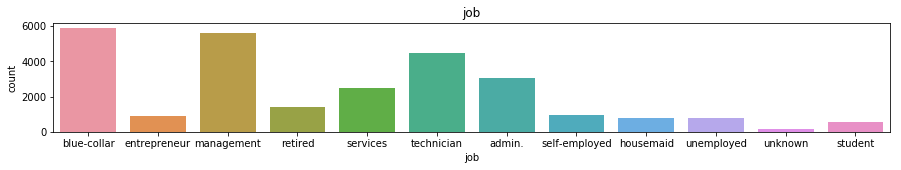

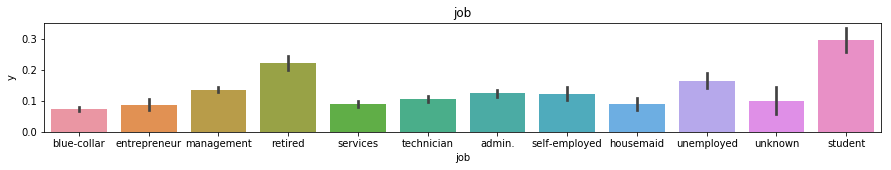

-----------------------------------------------------------


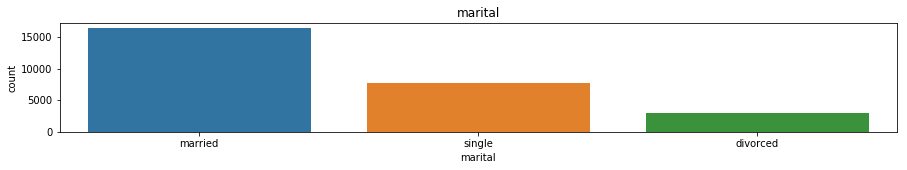

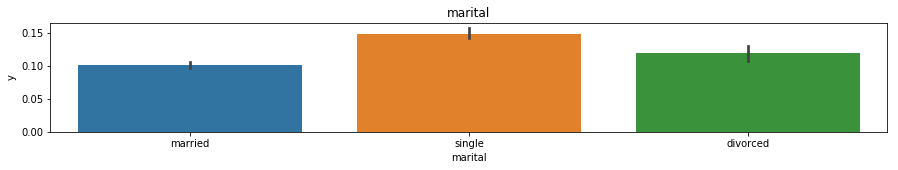

-----------------------------------------------------------


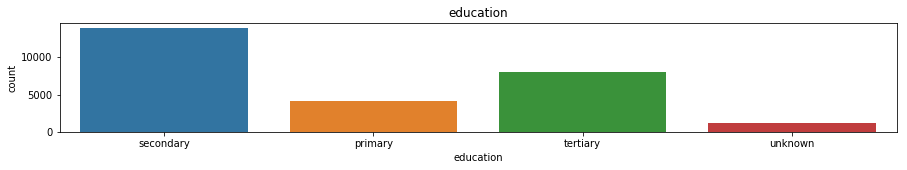

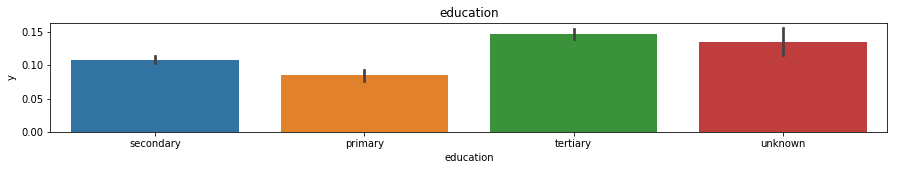

-----------------------------------------------------------


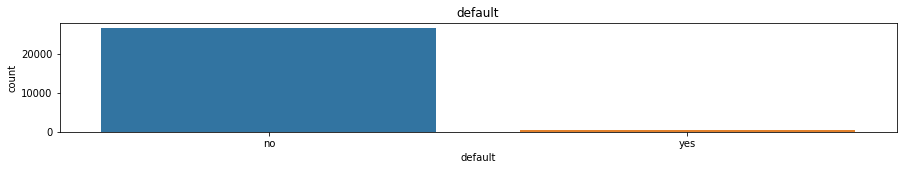

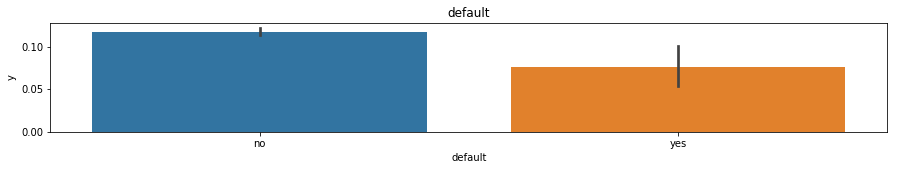

-----------------------------------------------------------


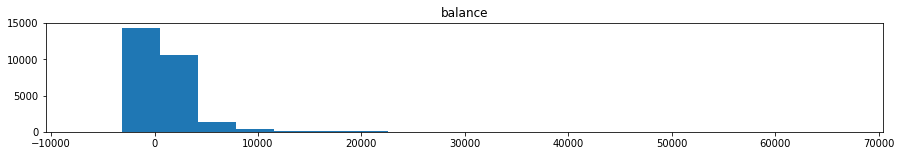

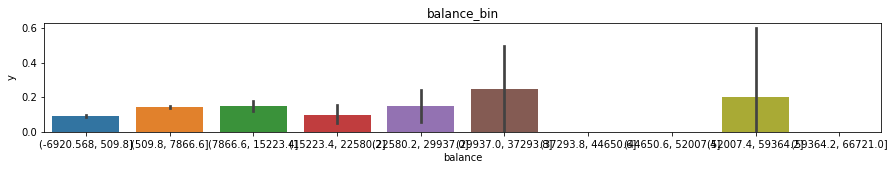

-----------------------------------------------------------


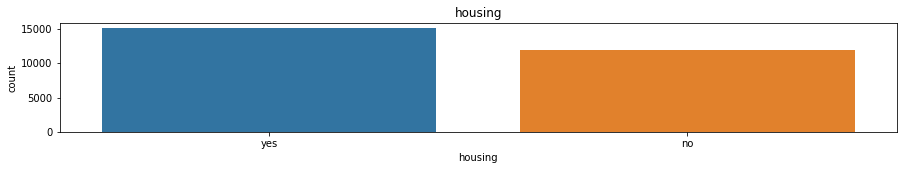

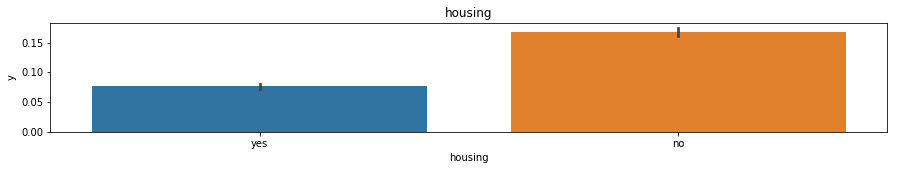

-----------------------------------------------------------


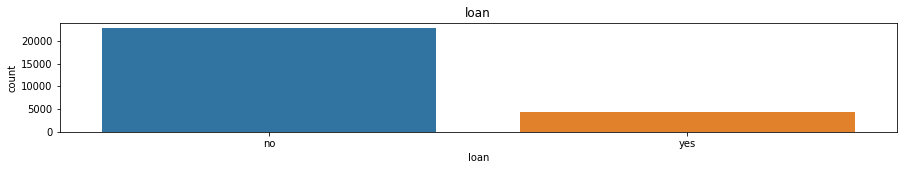

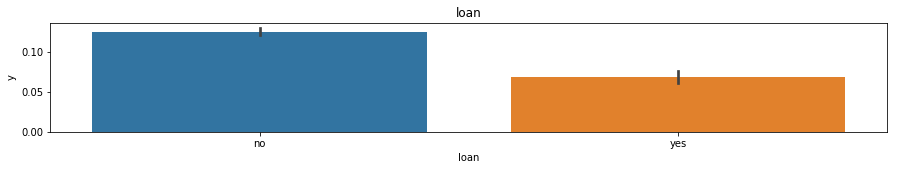

-----------------------------------------------------------


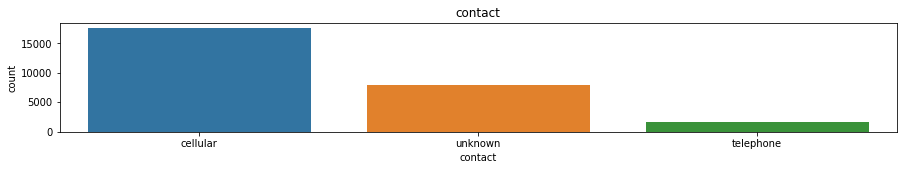

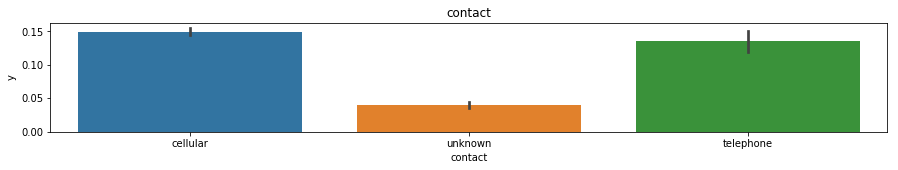

-----------------------------------------------------------


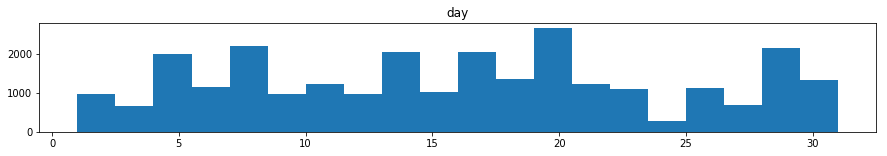

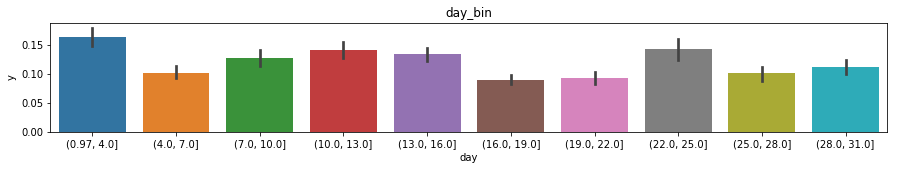

-----------------------------------------------------------


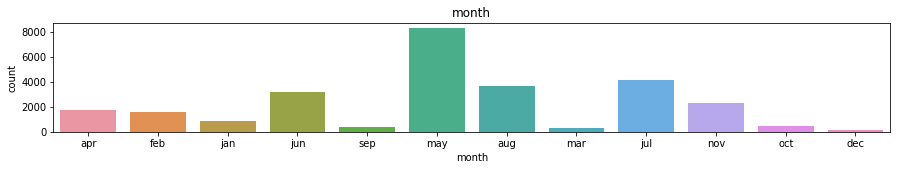

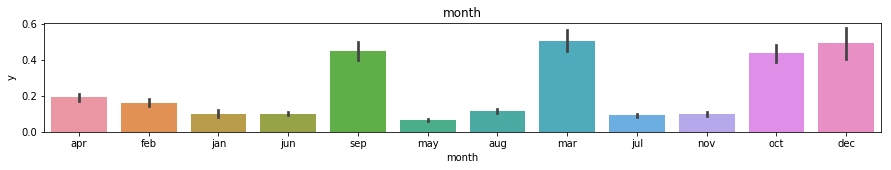

-----------------------------------------------------------


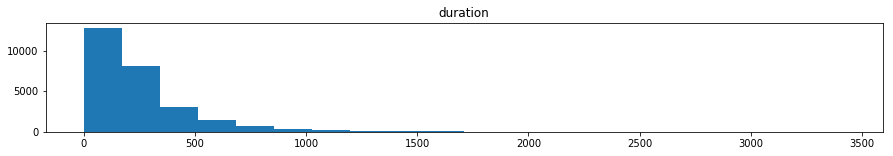

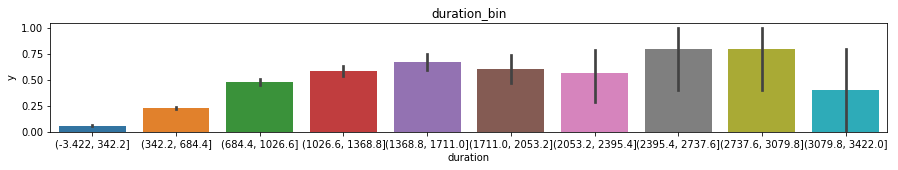

-----------------------------------------------------------


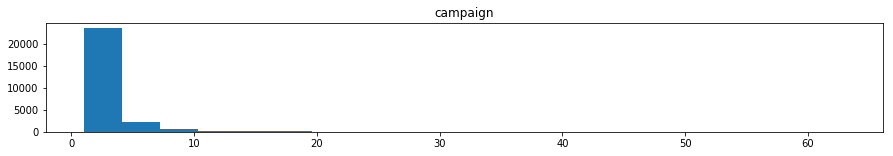

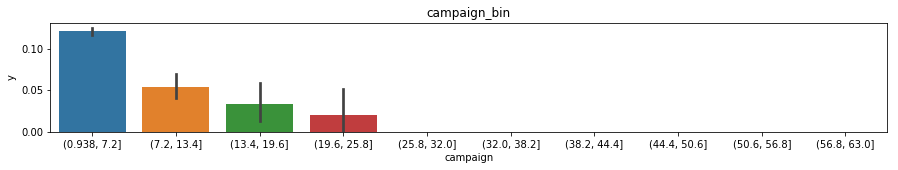

-----------------------------------------------------------


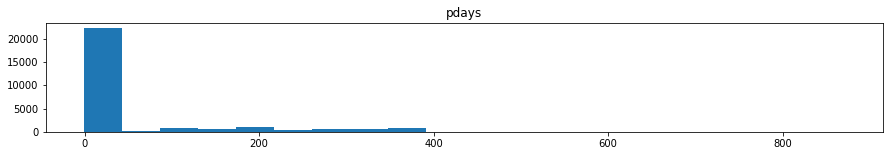

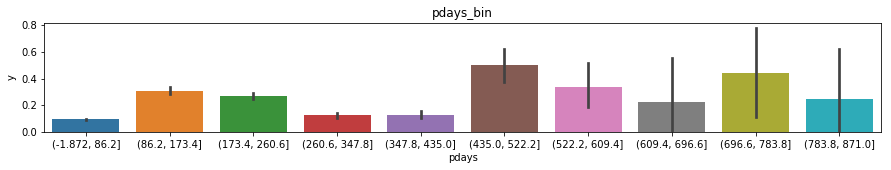

-----------------------------------------------------------


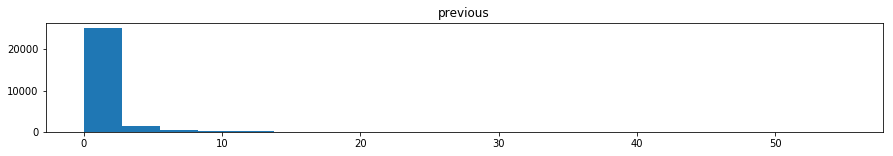

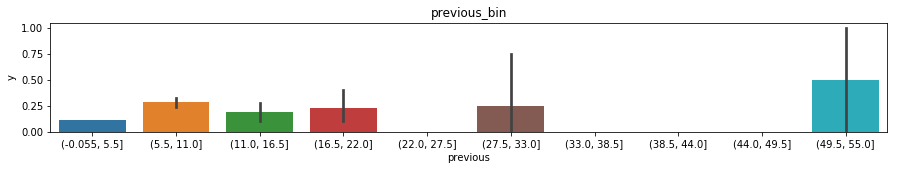

-----------------------------------------------------------


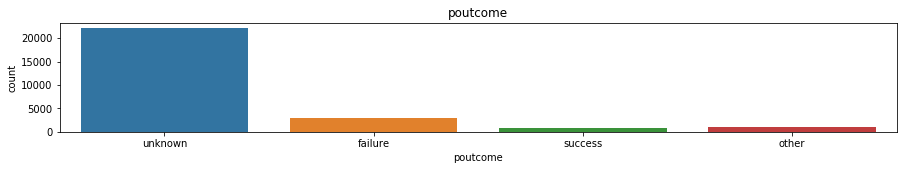

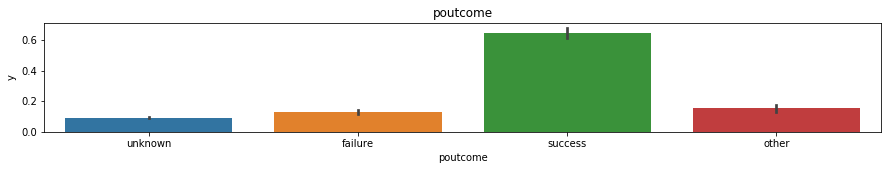

-----------------------------------------------------------


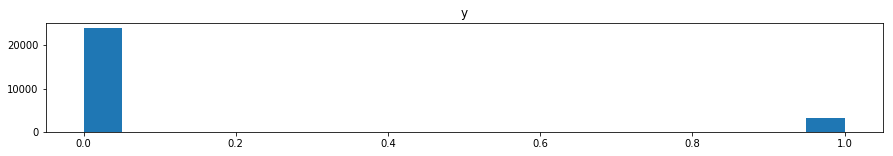

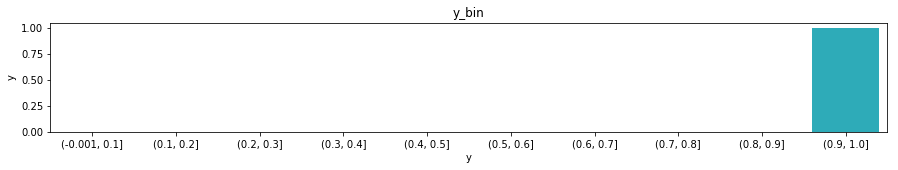

-----------------------------------------------------------


In [21]:
df_plot = df_out
for col_name in df_plot.columns:
    dtype = df_plot[col_name].dtype
    if (dtype == 'object'):
        plot_dist_obj(df_plot, col_name)
        plot_vs_obj(df_plot, col_name, 'y')
        print('-----------------------------------------------------------')
    else:
        plot_dist_num(df_plot, col_name)
        plot_vs_num(df_plot, col_name, 'y')
        print('-----------------------------------------------------------')

In [84]:
df_out['month'] = df_out['month'].map({'jan':1,
                       'feb':2,
                       'mar':3,
                       'apr':4,
                       'may':5,
                       'jun':6,
                       'jul':7,
                       'aug':8,
                       'sep':9,
                       'oct':10,
                       'nov':11,
                       'dec':12
                      })

In [85]:
df_out['mon_day'] = df_out['month'].astype(str) + '/' + df_out['day'].astype(str)

In [97]:
df_out['mon_day_2'] = df_out['month']*31 + df_out['day']

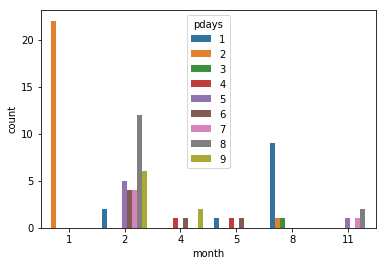

In [86]:
df_plot = df_out[(df_out.pdays<10)&(df_out.pdays!=-1)]
sns.countplot(x=df_plot.month, hue=df_plot.pdays)

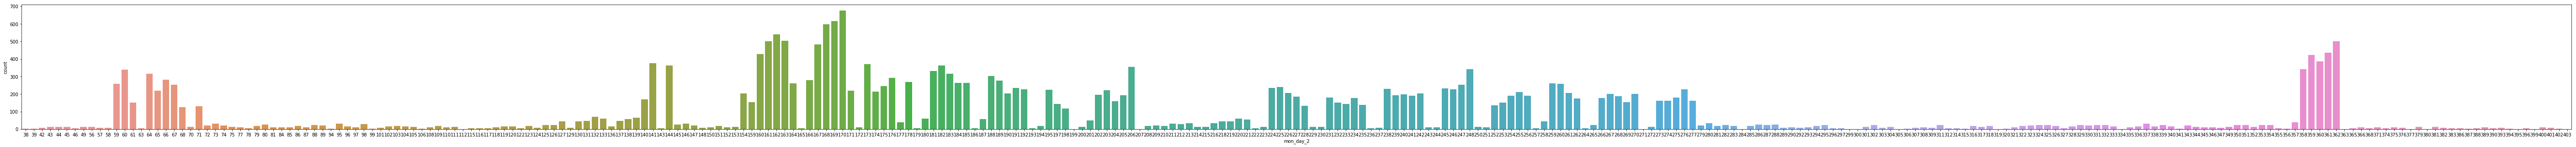

In [101]:
plt.figure(figsize=(100,5))
sns.countplot(df_out.mon_day_2)

In [103]:
df_train.pdays.max()

871

In [91]:
df_out.loc[(df_out.mon_day=='8/4')]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,mon_day
219,220,30,services,single,tertiary,no,1788,no,no,cellular,4,8,288,1,181,2,failure,1,8/4
380,381,52,management,married,tertiary,no,809,no,no,cellular,4,8,121,1,-1,0,unknown,0,8/4
923,924,35,technician,divorced,secondary,no,-281,no,no,cellular,4,8,148,1,-1,0,unknown,0,8/4
981,982,42,technician,married,secondary,no,4837,no,no,cellular,4,8,91,2,-1,0,unknown,0,8/4
1241,1242,47,services,married,primary,no,0,yes,no,cellular,4,8,226,1,-1,0,unknown,0,8/4
1540,1541,49,technician,married,secondary,no,3410,no,no,unknown,4,8,130,1,-1,0,unknown,0,8/4
1580,1581,30,management,single,tertiary,no,1673,no,no,cellular,4,8,200,1,-1,0,unknown,0,8/4
1853,1854,54,management,married,tertiary,no,11391,no,no,cellular,4,8,333,1,-1,0,unknown,0,8/4
1961,1962,49,services,married,secondary,no,3554,no,no,cellular,4,8,39,1,-1,0,unknown,0,8/4
2008,2009,47,unknown,married,unknown,no,194,no,no,cellular,4,8,108,1,-1,0,unknown,0,8/4


In [144]:
df_out.loc[(df_out.poutcome=='unknown') & (df_out.pdays!=-1)]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6169,6171,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,1
24984,24988,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,1
25026,25030,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,0
26766,26770,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,0


In [141]:
df_out.loc[(df_out.poutcome=='unknown') & (df_out.pdays!=-1), 'poutcome'] = 'other'

In [126]:
df_out[df_out.pdays==-1]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
10,11,35,self-employed,single,tertiary,no,353,no,no,cellular,12,aug,582,1,-1,0,unknown,1
11,12,34,technician,divorced,secondary,no,1451,yes,no,unknown,30,may,1097,15,-1,0,unknown,1
12,13,34,admin.,single,tertiary,no,625,no,yes,unknown,31,aug,34,1,-1,0,unknown,1
14,15,38,blue-collar,married,primary,no,5839,yes,no,unknown,4,jun,984,2,-1,0,unknown,1
15,16,71,technician,married,tertiary,no,383,no,no,cellular,27,apr,388,3,-1,0,unknown,1
16,17,62,management,married,tertiary,no,557,no,no,cellular,14,aug,185,1,-1,0,unknown,1


In [112]:
df_out[df_out.pdays==0]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [118]:
df_out[df_out.pdays==1]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
693,694,45,blue-collar,married,secondary,no,640,yes,no,cellular,5,may,214,1,1,1,success,0
5182,5184,38,management,married,tertiary,no,1199,no,no,cellular,4,aug,178,1,1,1,success,1
10293,10296,42,management,married,tertiary,no,372,yes,no,cellular,4,aug,153,3,1,2,success,1
11496,11499,41,blue-collar,married,primary,no,201,yes,no,cellular,4,feb,69,1,1,1,success,0
12563,12566,42,admin.,married,secondary,no,641,no,no,cellular,4,aug,111,1,1,1,other,0
15805,15808,33,technician,married,secondary,no,1026,no,no,cellular,4,aug,87,1,1,5,failure,0
17997,18001,34,admin.,married,tertiary,no,69,no,yes,cellular,4,aug,120,3,1,6,success,1
18992,18996,46,entrepreneur,married,secondary,no,122,no,no,cellular,6,feb,1047,2,1,7,failure,0
20351,20355,78,retired,married,unknown,no,38,no,no,telephone,4,aug,156,1,1,3,other,0
21995,21999,29,management,married,tertiary,no,198,yes,no,cellular,4,aug,453,1,1,1,failure,0


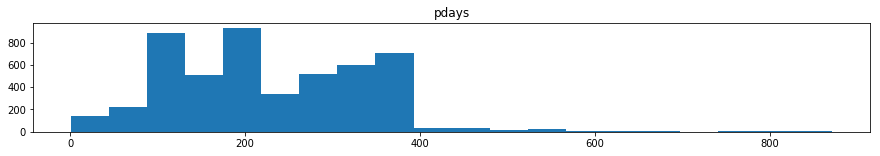

In [106]:
plot_dist_num(df_out[df_out.pdays!=-1], 'pdays')

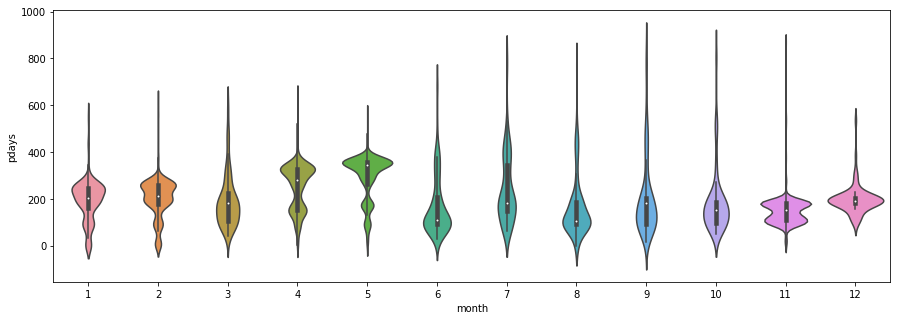

In [172]:
df_plot = df_out[df_out.pdays!=-1].copy()
df_plot['month'] = df_plot['month'].map({'jan':1,
                       'feb':2,
                       'mar':3,
                       'apr':4,
                       'may':5,
                       'jun':6,
                       'jul':7,
                       'aug':8,
                       'sep':9,
                       'oct':10,
                       'nov':11,
                       'dec':12
                      })
plt.figure(figsize=(15,5))
sns.violinplot(y=df_plot['pdays'], x=df_plot['month'])

In [57]:
df_new[df_new.duration==0]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12032,12035,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,0
13449,13452,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,0


In [149]:
df_new = pd.read_csv('./df_new_1.csv')

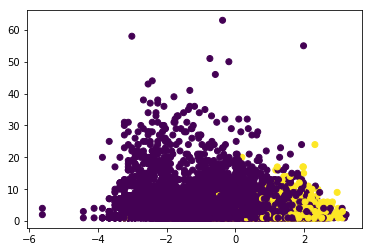

In [150]:
plt.scatter(x=df_new.duration_log, y=df_new.freq, c=df_new.y)

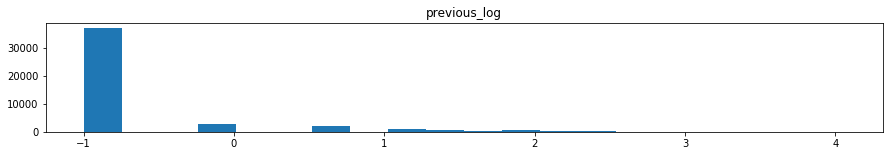

In [143]:
plot_dist_num(df_new, 'previous_log')

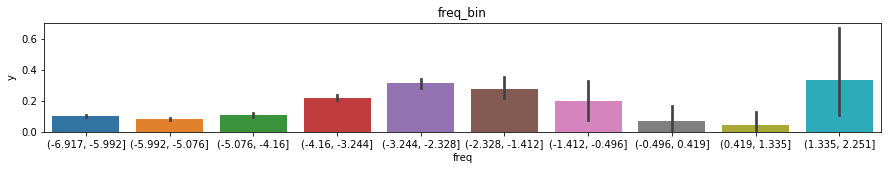

In [138]:
plot_vs_num(df_new, 'freq', 'y')

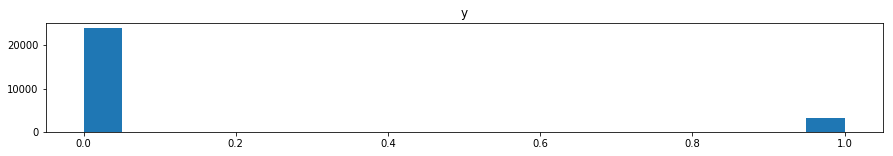

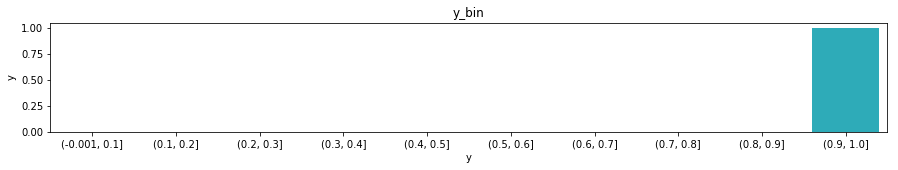

-----------------------------------------------------------


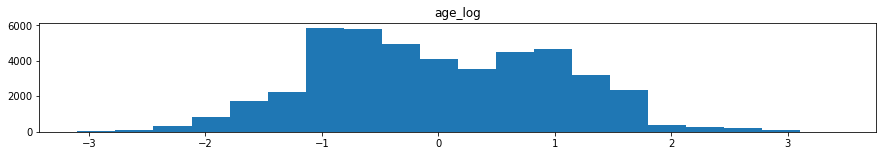

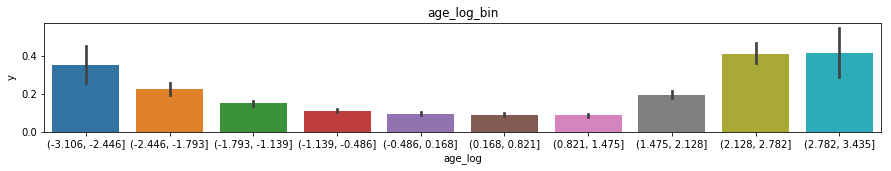

-----------------------------------------------------------


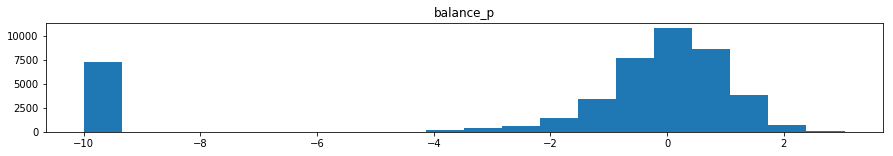

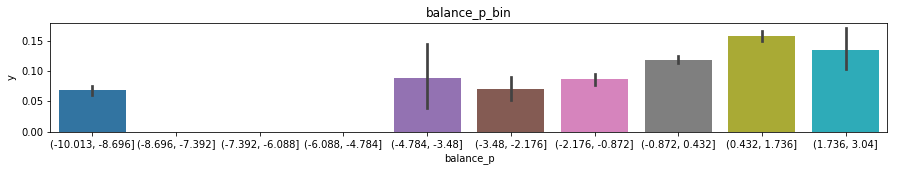

-----------------------------------------------------------


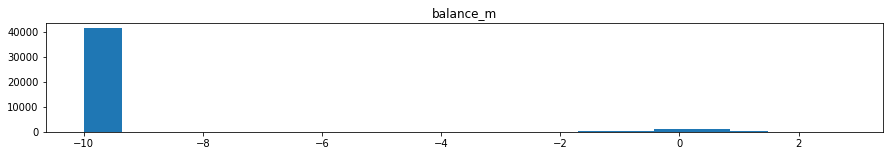

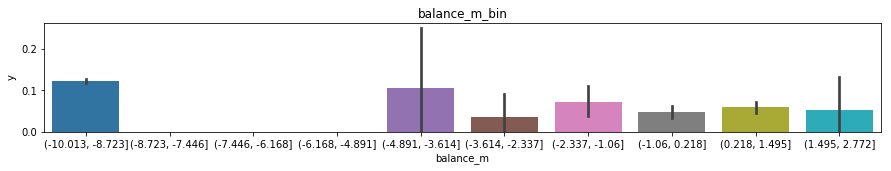

-----------------------------------------------------------


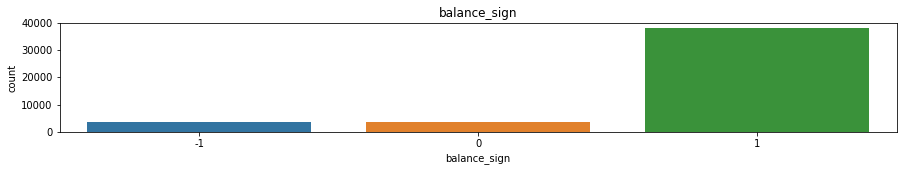

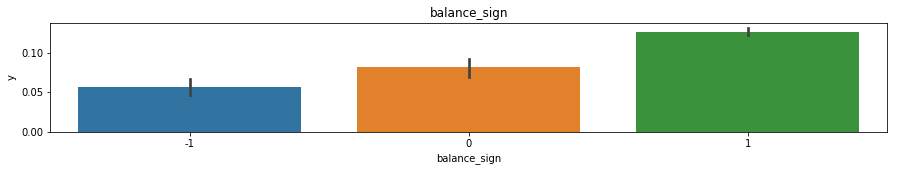

-----------------------------------------------------------


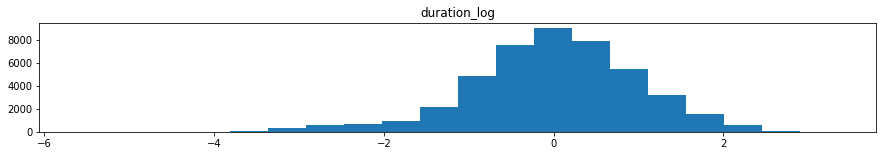

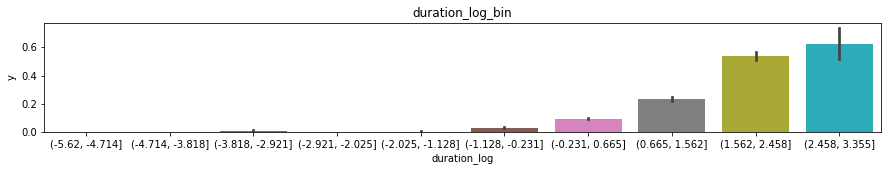

-----------------------------------------------------------


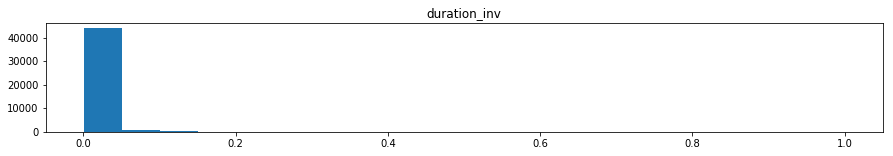

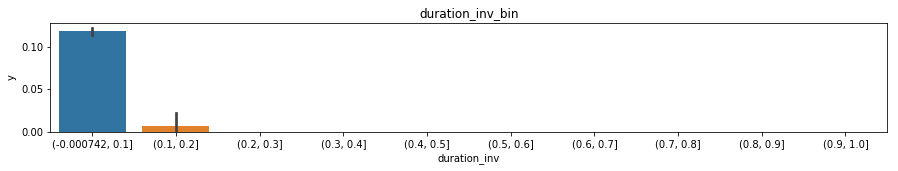

-----------------------------------------------------------


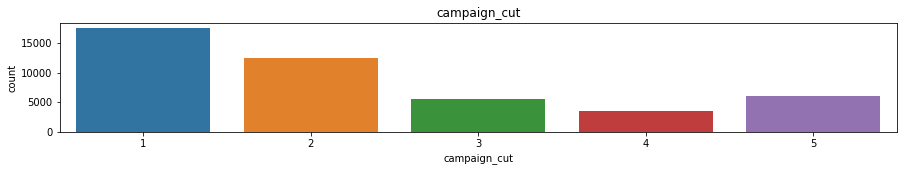

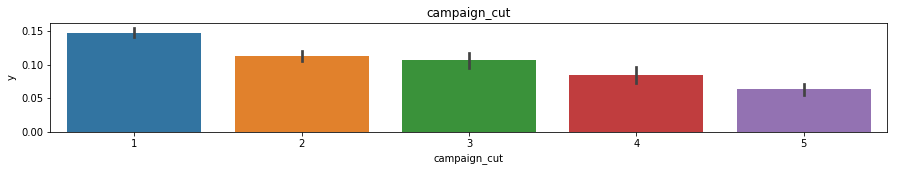

-----------------------------------------------------------


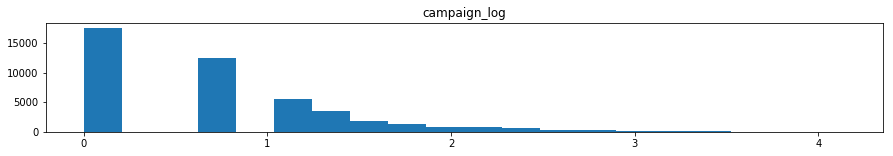

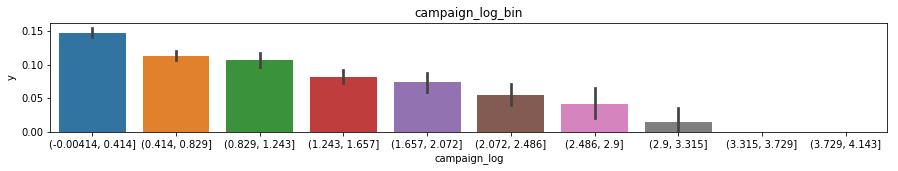

-----------------------------------------------------------


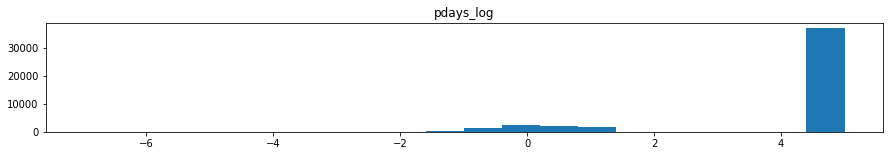

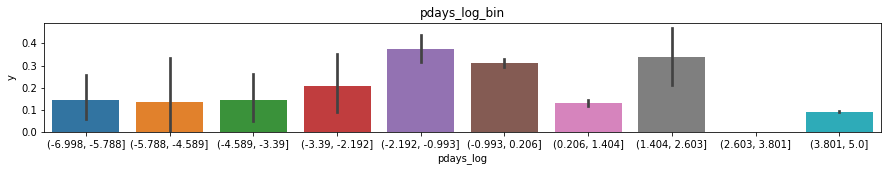

-----------------------------------------------------------


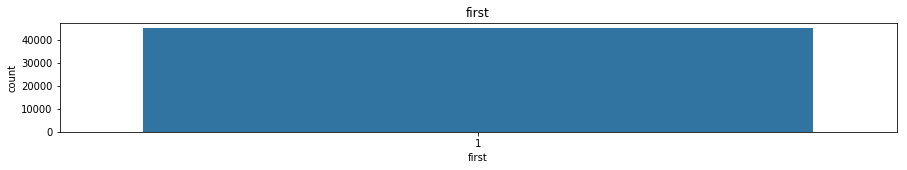

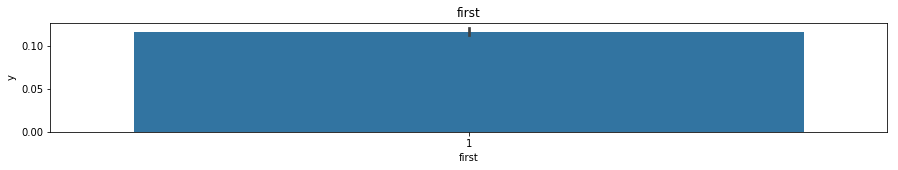

-----------------------------------------------------------


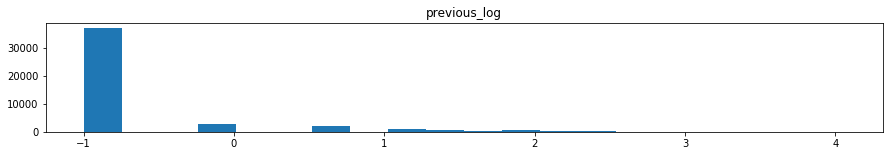

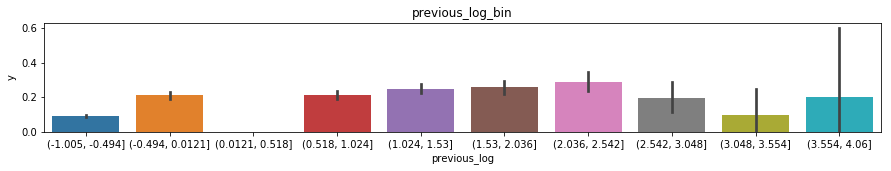

-----------------------------------------------------------


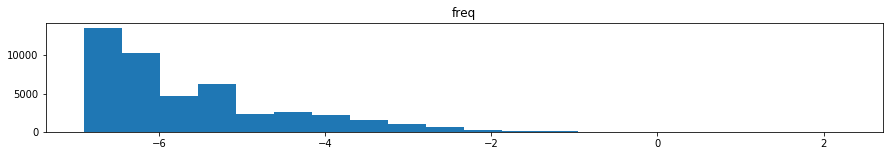

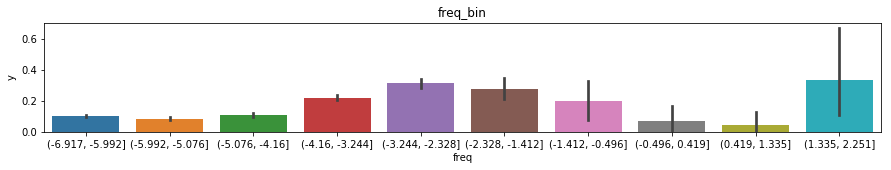

-----------------------------------------------------------


In [145]:
for col_name in df_new.columns:
    dtype = df_new[col_name].dtype
    if (dtype == 'int64' or dtype == 'object'):
        plot_dist_obj(df_new, col_name)
        plot_vs_obj(df_new, col_name, 'y')
        print('-----------------------------------------------------------')
    elif dtype == 'float':
        plot_dist_num(df_new, col_name)
        plot_vs_num(df_new, col_name, 'y')
        print('-----------------------------------------------------------')